#### z5499630 Boyang Peng

Simple code for finding missing labels

In [ ]:
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path
from tqdm import tqdm
import pandas as pd

# area = 'head'

image_dir = 'datasets/turtles-data/data/images'
annotation_file = 'datasets/turtles-data/data/annotations.json'
metadata_file = 'datasets/turtles-data/data/metadata_splits.csv'

coco = COCO(annotation_file)

metadata = pd.read_csv(metadata_file)

all_category_ids = coco.getCatIds(catNms=[''])
all_image_ids = coco.getImgIds(catIds=all_category_ids)

head_category_ids = coco.getCatIds(catNms=['head'])
head_image_ids = coco.getImgIds(catIds=head_category_ids)

turtle_category_ids = coco.getCatIds(catNms=['turtle'])
turtle_image_ids = coco.getImgIds(catIds=turtle_category_ids)

flipper_category_ids = coco.getCatIds(catNms=['flipper'])
flipper_image_ids = coco.getImgIds(catIds=flipper_category_ids)

print(f'total:', len(all_image_ids), f'head:', len(head_image_ids), len(set(all_image_ids) - set(head_image_ids)) == len(all_image_ids)-len(head_image_ids))
missinghead = set(all_image_ids) - set(head_image_ids)
print(f"Ids of images that are missing head:")
print(sorted(missinghead))

print(f'total:', len(all_image_ids), f'turtle:', len(turtle_image_ids), len(set(all_image_ids) - set(turtle_image_ids)) == len(all_image_ids)-len(turtle_image_ids))
missingturtle = set(all_image_ids) - set(turtle_image_ids)
print(f"Ids of images that are missing turtle:")
print(sorted(missingturtle))

print(f'total:', len(all_image_ids), f'flipper:', len(flipper_image_ids), len(set(all_image_ids) - set(flipper_image_ids)) == len(all_image_ids)-len(flipper_image_ids))
missingflipper = set(all_image_ids) - set(flipper_image_ids)
print(f"Ids of images that are missing flippers:")
print(sorted(missingflipper))



loading annotations into memory...
Done (t=1.83s)
creating index...
index created!
total: 8729 head: 8526 True
Ids of images that are missing head:
[56, 73, 115, 211, 259, 260, 275, 276, 281, 443, 506, 541, 610, 651, 809, 837, 874, 878, 883, 908, 932, 933, 934, 944, 956, 970, 1085, 1094, 1154, 1234, 1287, 1313, 1316, 1323, 1348, 1371, 1418, 1466, 1467, 1526, 1563, 1598, 1794, 1835, 1860, 1862, 1871, 1872, 1886, 1894, 1937, 1970, 2036, 2076, 2130, 2132, 2238, 2255, 2351, 2404, 2427, 2445, 2605, 2677, 2772, 2880, 2882, 2903, 2911, 3010, 3015, 3134, 3175, 3182, 3200, 3210, 3255, 3285, 3297, 3316, 3320, 3370, 3382, 3399, 3435, 3446, 3449, 3454, 3460, 3515, 3535, 3543, 3544, 3565, 3566, 3576, 3583, 3618, 3771, 3793, 3814, 3941, 3984, 3996, 4034, 4090, 4096, 4103, 4160, 4168, 4187, 4198, 4226, 4236, 4264, 4290, 4320, 4330, 4372, 4438, 4443, 4688, 4692, 4695, 4698, 4735, 4879, 5363, 5364, 5431, 5492, 5497, 5500, 5525, 5685, 5710, 5804, 5827, 5946, 5949, 5951, 5973, 5984, 6003, 6115, 6141, 614

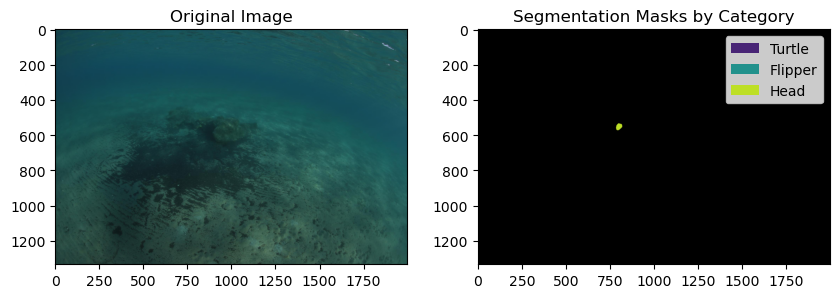

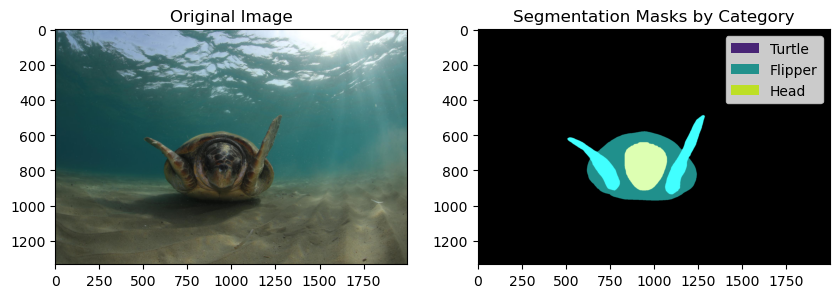

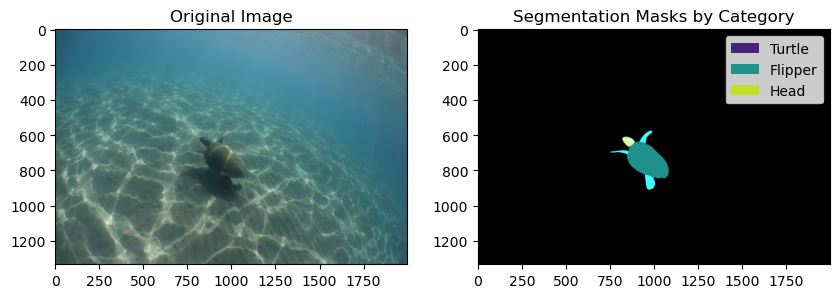

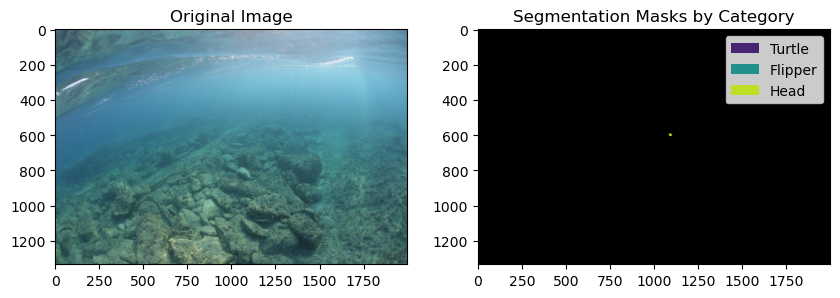

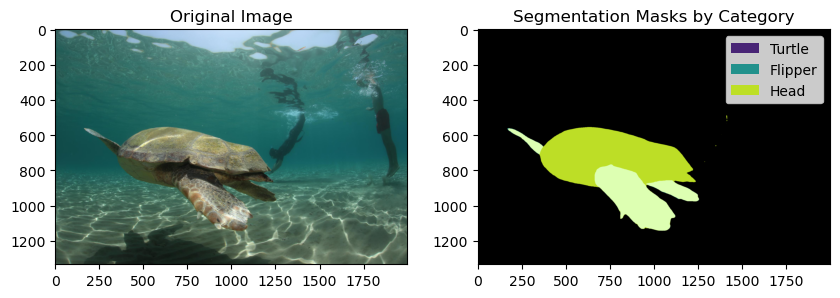

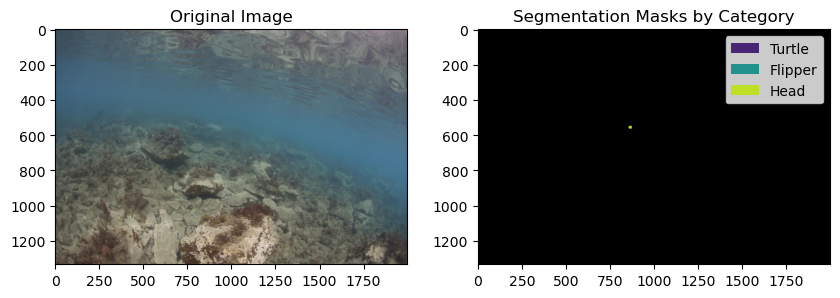

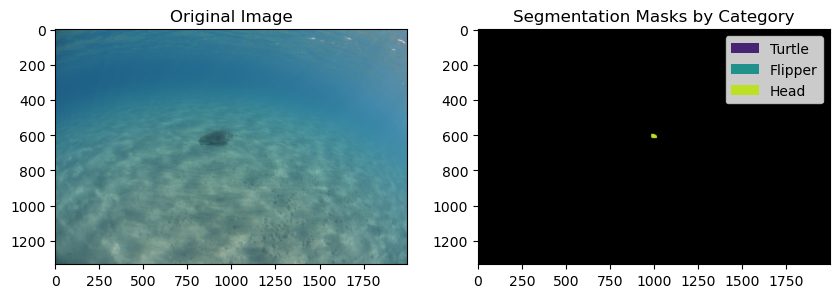

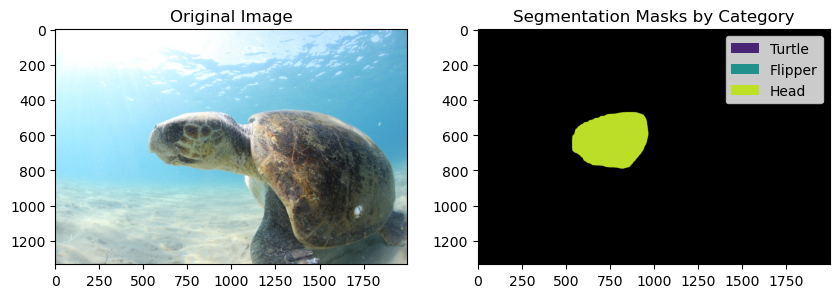

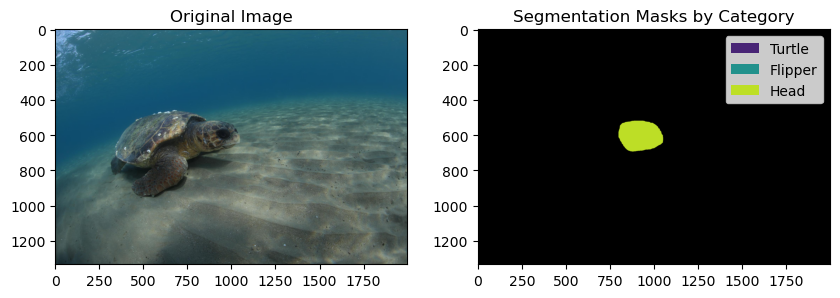

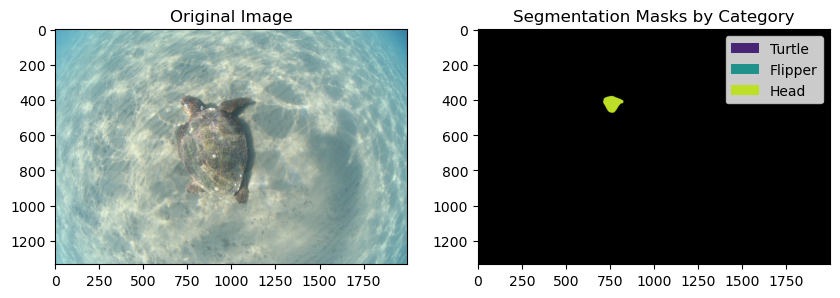

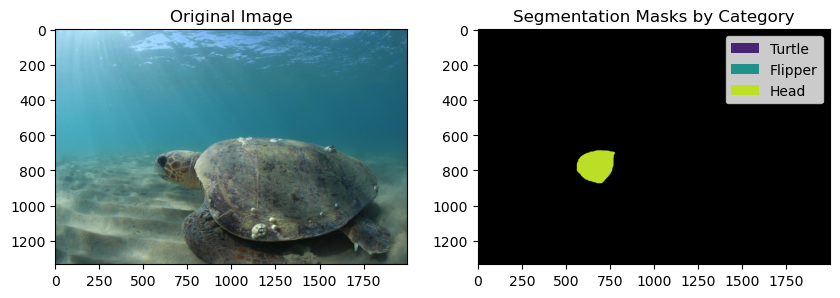

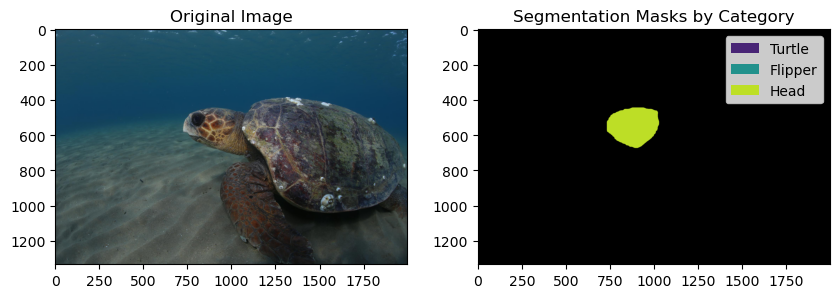

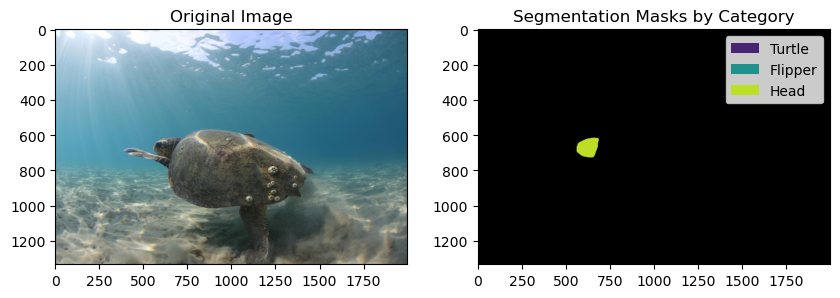

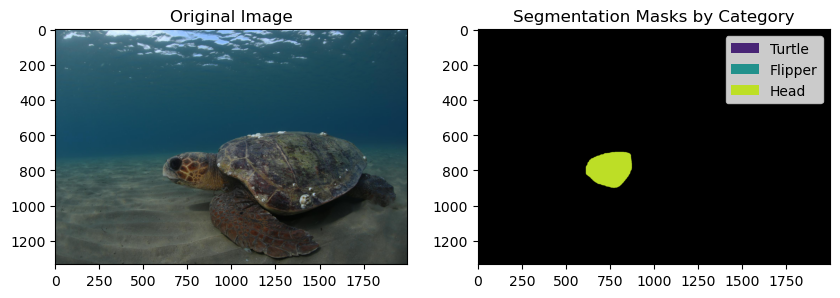

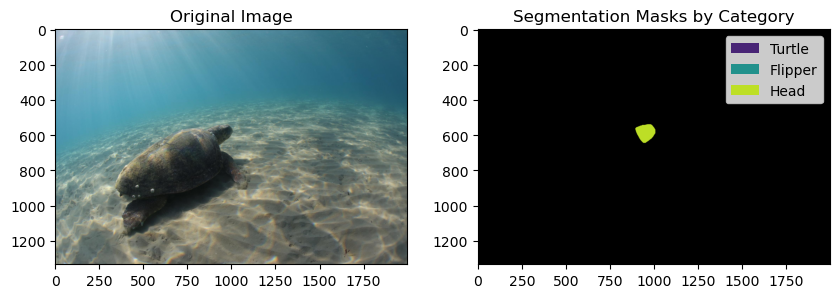

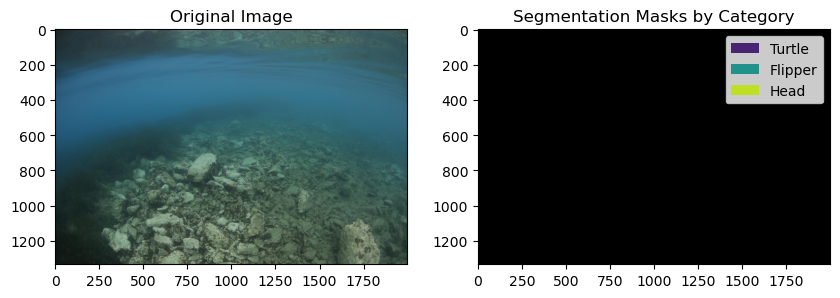

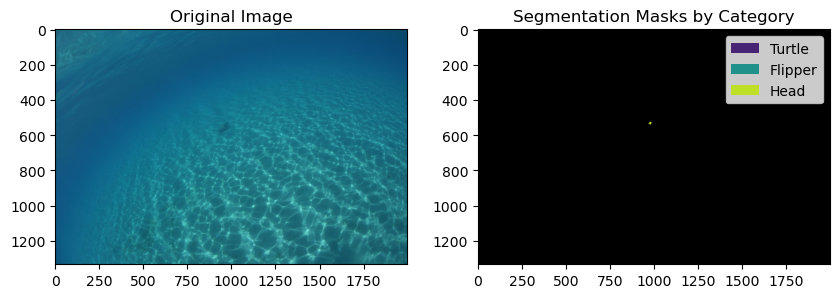

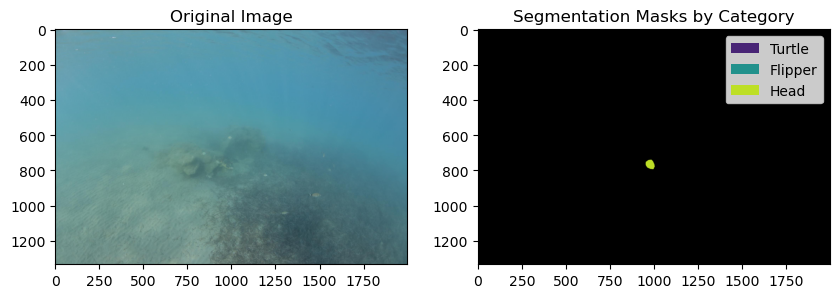

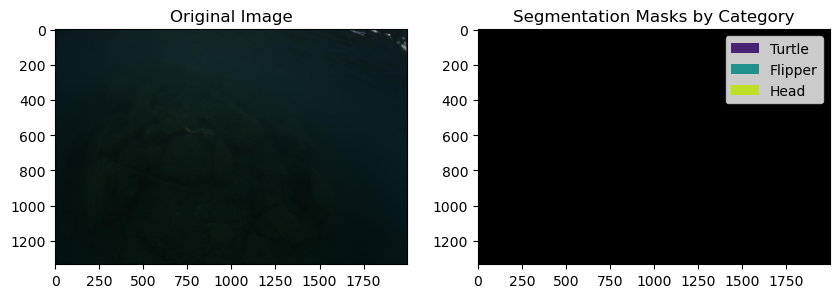

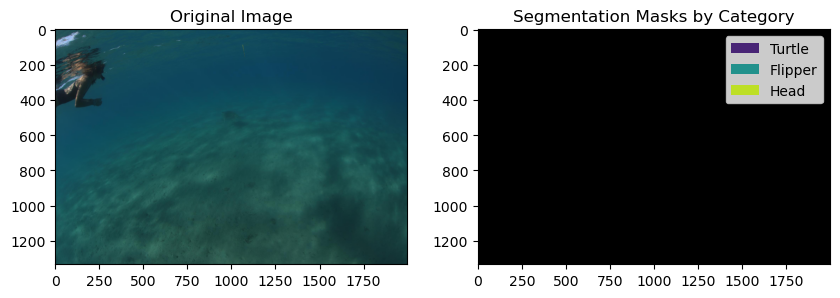

In [ ]:
from matplotlib.cm import viridis

img_dir = '/datasets/turtles-data/data'
# missingturtle, missinghead, missingflipper
for id in missingturtle:
    image_id = id
    img = coco.imgs[image_id]

    image = np.array(Image.open(img_dir + img['file_name']))
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    
    cat_ids = coco.getCatIds()
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    
    # mask = coco.annToMask(anns[0])
    # Get colors from viridis colormap
    category_colors = {
        1: viridis(0.1)[:3],    # turtle
        2: viridis(0.5)[:3],    # flipper
        3: viridis(0.9)[:3]     # head
    }

    colored_mask = np.zeros((image.shape[0], image.shape[1], 3))

    for ann in anns:
        category_id = ann['category_id']
        binary_mask = coco.annToMask(ann)
        for i in range(3):  # RGB channels
            colored_mask[:,:,i] += binary_mask * category_colors[category_id][i]

    # Clip values to [0,1] range
    colored_mask = np.clip(colored_mask, 0, 1)

    # Display the colored mask
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.imshow(colored_mask)
    plt.title('Segmentation Masks by Category')

    legend_elements = [plt.Rectangle((0,0),1,1, fc=category_colors[i]) for i in [1,2,3]]
    plt.legend(legend_elements, ['Turtle', 'Flipper', 'Head'], loc='upper right')
    plt.show()
    

